- Exercici 1: 
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

- Exercici 2: 
Treu les stopwords i realitza stemming al teu conjunt de dades.

- Exercici 3: 
Realitza sentiment analysis al teu conjunt de dades.

### Exercici 1: 

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

#### Càrrega del text
- Importem el text a analitzar: en aquest cas l'importem d'una pàgina web

In [51]:
# Importem el text de la següent pàgina web: https://www.bbc.com/news/business-65415529 (noticia de la BBC)

import requests
from bs4 import BeautifulSoup

# Indiquem la pagina web i fem la sol·licitud HTTP

url = ('https://www.bbc.com/news/business-65415529')
response = requests.get(url)

# Analitzem el contingut HTML de la pàgina:

soup = BeautifulSoup(response.content, 'html.parser')

# Busquem el 'text' de la pàgina

text = soup.get_text()

# Mostrem el 'text':

print(text)

 

Can Morocco solve Europe’s energy crisis? - BBC NewsBBC HomepageSkip to contentAccessibility HelpYour accountHomeNewsSportReelWorklifeTravelFutureMore menuMore menuSearch BBCHomeNewsSportReelWorklifeTravelFutureCultureMusicTVWeatherSoundsClose menuBBC NewsMenuHomeWar in UkraineCoronationClimateVideoWorldUKBusinessTechScienceMoreStoriesEntertainment & ArtsHealthWorld News TVIn PicturesReality CheckNewsbeatLong ReadsBusinessMarket DataNew EconomyNew Tech EconomyCompaniesTechnology of BusinessEconomyCEO SecretsGlobal TradeCost of LivingCan Morocco solve Europe’s energy crisis?Published4 days agocommentsCommentsShareclose panelShare pageCopy linkAbout sharingImage source, Getty ImagesImage caption, Morocco is home to the vast Noor-Ouarzazate Solar ComplexBy Jonathan JosephsBusiness reporter, BBC News, RabatMorocco has big ambitions to export electricity produced by solar and wind farms to Europe, but should it be prioritising such renewable energy for its home market?"The resources we have

In [52]:
# Al carregar el text de la pàgina web, s'agafa tot el contingut.
 # Eliminem la resta de contingut per carregar únicmanet el text a analizar, en aquest cas la noticia.

# 'tallem' el text allà a on finalitza la noticia:

text_split = text.split("You can watch more about Morocco's energy transformation", 1)[0].split("BBC News, Rabat", 1)[-1]

print(text_split)

Morocco has big ambitions to export electricity produced by solar and wind farms to Europe, but should it be prioritising such renewable energy for its home market?"The resources we have here could be one of the big, big answers to European demand," says Moroccan energy entrepreneur Moundir Zniber.Mr Zniber is a passionate man who senses opportunity out of crisis."I think Morocco represents the best opportunity to get the European continent away from the dependency it has today on Russian gas," he says.Mr Zniber has spent the past 15 years building his company, Gaia Energy, into one of the leaders of a renewable energy revolution in his home country."Morocco has truly one of the best solar and wind resources in the world combined," he says. "We don't have oil, we don't have natural gas, but we have a potential that is just amazing."The war in Ukraine has catalysed Europe's politicians to increase their efforts to tackle climate change with new sources of clean energy. Morocco hopes to 

#### Càlcul de la frequècnia de les paraules

- Dividim el 'text' en tokens ('tokenize')
- Calculem la freqüència


In [53]:
# Fem la divisió en tokens ('tokenize'):

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

tokens = word_tokenize(text_split)

print(tokens)

['Morocco', 'has', 'big', 'ambitions', 'to', 'export', 'electricity', 'produced', 'by', 'solar', 'and', 'wind', 'farms', 'to', 'Europe', ',', 'but', 'should', 'it', 'be', 'prioritising', 'such', 'renewable', 'energy', 'for', 'its', 'home', 'market', '?', '``', 'The', 'resources', 'we', 'have', 'here', 'could', 'be', 'one', 'of', 'the', 'big', ',', 'big', 'answers', 'to', 'European', 'demand', ',', "''", 'says', 'Moroccan', 'energy', 'entrepreneur', 'Moundir', 'Zniber.Mr', 'Zniber', 'is', 'a', 'passionate', 'man', 'who', 'senses', 'opportunity', 'out', 'of', 'crisis', '.', '``', 'I', 'think', 'Morocco', 'represents', 'the', 'best', 'opportunity', 'to', 'get', 'the', 'European', 'continent', 'away', 'from', 'the', 'dependency', 'it', 'has', 'today', 'on', 'Russian', 'gas', ',', "''", 'he', 'says.Mr', 'Zniber', 'has', 'spent', 'the', 'past', '15', 'years', 'building', 'his', 'company', ',', 'Gaia', 'Energy', ',', 'into', 'one', 'of', 'the', 'leaders', 'of', 'a', 'renewable', 'energy', 're

In [54]:
# Calculem la freqüencia de les paraules

freq_dist_tokens = FreqDist(tokens)

print(freq_dist_tokens.most_common(20))  # primeres (20) paraules amb més frequència

[('the', 56), (',', 55), ('to', 43), ('of', 41), ('that', 30), ('and', 29), ('.', 25), ('is', 22), ('``', 20), ('Morocco', 18), ('from', 17), ("'s", 17), ("''", 16), ('in', 14), ('has', 13), ('energy', 13), ('wind', 12), ('for', 12), ('a', 12), ('electricity', 10)]


#### Comentaris:

- Observem que al fer 'tokenize' i porteriorment calcular la frequència, a part de les paraules, també calcula la resta de símbols i signes de puntuació.
- 'Elminem' aquests símbols i signes de puntuació mitjançant la funció "re.sub(r'[^\w\s]'" que elimina tots els caracters que nos son paraules ni espais en blanc.

In [55]:
# text sense puntuació

import re

text_net = re.sub(r'[^\w\s]', '', text_split)

print(text_net)

Morocco has big ambitions to export electricity produced by solar and wind farms to Europe but should it be prioritising such renewable energy for its home marketThe resources we have here could be one of the big big answers to European demand says Moroccan energy entrepreneur Moundir ZniberMr Zniber is a passionate man who senses opportunity out of crisisI think Morocco represents the best opportunity to get the European continent away from the dependency it has today on Russian gas he saysMr Zniber has spent the past 15 years building his company Gaia Energy into one of the leaders of a renewable energy revolution in his home countryMorocco has truly one of the best solar and wind resources in the world combined he says We dont have oil we dont have natural gas but we have a potential that is just amazingThe war in Ukraine has catalysed Europes politicians to increase their efforts to tackle climate change with new sources of clean energy Morocco hopes to be part of the solutionIt is

In [56]:
# Tornem a fer la divisió en tokens ('tokenize'):

tokens_net = word_tokenize(text_net)

print(tokens_net)

['Morocco', 'has', 'big', 'ambitions', 'to', 'export', 'electricity', 'produced', 'by', 'solar', 'and', 'wind', 'farms', 'to', 'Europe', 'but', 'should', 'it', 'be', 'prioritising', 'such', 'renewable', 'energy', 'for', 'its', 'home', 'marketThe', 'resources', 'we', 'have', 'here', 'could', 'be', 'one', 'of', 'the', 'big', 'big', 'answers', 'to', 'European', 'demand', 'says', 'Moroccan', 'energy', 'entrepreneur', 'Moundir', 'ZniberMr', 'Zniber', 'is', 'a', 'passionate', 'man', 'who', 'senses', 'opportunity', 'out', 'of', 'crisisI', 'think', 'Morocco', 'represents', 'the', 'best', 'opportunity', 'to', 'get', 'the', 'European', 'continent', 'away', 'from', 'the', 'dependency', 'it', 'has', 'today', 'on', 'Russian', 'gas', 'he', 'saysMr', 'Zniber', 'has', 'spent', 'the', 'past', '15', 'years', 'building', 'his', 'company', 'Gaia', 'Energy', 'into', 'one', 'of', 'the', 'leaders', 'of', 'a', 'renewable', 'energy', 'revolution', 'in', 'his', 'home', 'countryMorocco', 'has', 'truly', 'one', '

In [57]:
# I tornem a calcular la freqüencia de les paraules

freq_dist_tokens_net = FreqDist(tokens_net)

print(freq_dist_tokens_net.most_common(20))  # primeres (20) paraules amb més frequència

[('the', 56), ('to', 43), ('of', 41), ('that', 30), ('and', 29), ('is', 22), ('from', 17), ('Morocco', 14), ('in', 14), ('energy', 13), ('has', 12), ('wind', 12), ('for', 12), ('a', 12), ('electricity', 10), ('solar', 10), ('renewable', 10), ('it', 9), ('its', 9), ('power', 9)]


#### Comentaris:

- Un cop eliminat els signes de puntuació, etc., observem que se'ns indica únicament la freqüencia de paraules i no de signes de puntuació.


--------------------------------------------------------------------------------------------------------------------------------

### Exercici 2: 

Treu les stopwords i realitza stemming al teu conjunt de dades.

#### Eliminació 'stopwords'

- Les 'stopwords' son totes aquelles paraules comuns i irrellevants que son poc probable que transmetin opinions.
- Les 'stopwords' son paraules comuns que no tenen molt significat com: "and", "the", "it"...

In [58]:
# Carreguem la llista de 'stopwords' en 'english'

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RSIMONNE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# Eliminem les 'stopwords' del text:

filtered_tokens = [token for token in tokens_net if token.lower() not in stop_words]

print(filtered_tokens)

['Morocco', 'big', 'ambitions', 'export', 'electricity', 'produced', 'solar', 'wind', 'farms', 'Europe', 'prioritising', 'renewable', 'energy', 'home', 'marketThe', 'resources', 'could', 'one', 'big', 'big', 'answers', 'European', 'demand', 'says', 'Moroccan', 'energy', 'entrepreneur', 'Moundir', 'ZniberMr', 'Zniber', 'passionate', 'man', 'senses', 'opportunity', 'crisisI', 'think', 'Morocco', 'represents', 'best', 'opportunity', 'get', 'European', 'continent', 'away', 'dependency', 'today', 'Russian', 'gas', 'saysMr', 'Zniber', 'spent', 'past', '15', 'years', 'building', 'company', 'Gaia', 'Energy', 'one', 'leaders', 'renewable', 'energy', 'revolution', 'home', 'countryMorocco', 'truly', 'one', 'best', 'solar', 'wind', 'resources', 'world', 'combined', 'says', 'dont', 'oil', 'dont', 'natural', 'gas', 'potential', 'amazingThe', 'war', 'Ukraine', 'catalysed', 'Europes', 'politicians', 'increase', 'efforts', 'tackle', 'climate', 'change', 'new', 'sources', 'clean', 'energy', 'Morocco', '

In [60]:
# I tornem a calcular la freqüencia de les paraules

freq_dist_filtered_tokens = FreqDist(filtered_tokens)

print(freq_dist_filtered_tokens.most_common(20))      # primeres (20) paraules amb més frequència

[('Morocco', 14), ('energy', 13), ('wind', 12), ('electricity', 10), ('solar', 10), ('renewable', 10), ('power', 9), ('says', 8), ('also', 8), ('renewables', 8), ('gas', 7), ('needs', 7), ('could', 6), ('green', 6), ('adds', 6), ('Moroccan', 5), ('Energy', 5), ('country', 5), ('World', 5), ('big', 4)]


#### Comentaris:

- Podem comprovar que s'han eliminat les 'stopwords'.
- Anteriorment la paraula 'the', 'to' o 'of' (incloses al llistat de 'stopwords') eren les de major freqüència al text.
- Havent procedit a eliminar les 'stopwords' observem que les paraules de major freqüència son 'Morocco', 'energy', 'wind', etc.

#### 'Stemming'

- Reducció de les paraules a la seva arrel o base morfològica

In [61]:
# Fem Stemming del text amb 'PorterStemmer'

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

print(stemmed_tokens)

['morocco', 'big', 'ambit', 'export', 'electr', 'produc', 'solar', 'wind', 'farm', 'europ', 'prioritis', 'renew', 'energi', 'home', 'marketth', 'resourc', 'could', 'one', 'big', 'big', 'answer', 'european', 'demand', 'say', 'moroccan', 'energi', 'entrepreneur', 'moundir', 'znibermr', 'zniber', 'passion', 'man', 'sens', 'opportun', 'crisisi', 'think', 'morocco', 'repres', 'best', 'opportun', 'get', 'european', 'contin', 'away', 'depend', 'today', 'russian', 'ga', 'saysmr', 'zniber', 'spent', 'past', '15', 'year', 'build', 'compani', 'gaia', 'energi', 'one', 'leader', 'renew', 'energi', 'revolut', 'home', 'countrymorocco', 'truli', 'one', 'best', 'solar', 'wind', 'resourc', 'world', 'combin', 'say', 'dont', 'oil', 'dont', 'natur', 'ga', 'potenti', 'amazingth', 'war', 'ukrain', 'catalys', 'europ', 'politician', 'increas', 'effort', 'tackl', 'climat', 'chang', 'new', 'sourc', 'clean', 'energi', 'morocco', 'hope', 'part', 'solutionit', 'europ', 'doorstep', 'ambiti', 'plan', 'gener', '52', '

In [62]:
# I tornem a calcular la freqüencia de les paraules

freq_dist_stemmed_tokens = FreqDist(stemmed_tokens)

print(freq_dist_stemmed_tokens.most_common(20))      # primeres (20) paraules amb més frequència

[('renew', 19), ('energi', 18), ('morocco', 17), ('wind', 12), ('electr', 11), ('solar', 11), ('need', 10), ('power', 10), ('say', 8), ('world', 8), ('countri', 8), ('also', 8), ('export', 7), ('ga', 7), ('add', 7), ('could', 6), ('moroccan', 6), ('green', 6), ('europ', 5), ('zniber', 5)]


#### Comentaris:

- Observem en aquest cas que al reduir les paraules a la seva arrel obtenim freqüències diferents.
- Les paraules 'renewable' i 'renewables' han passat a 'renew', fent sumar les frqüències de les dues paraules.


In [63]:
# Fem Stemming del text amb 'SnowballStemmer'

from nltk.stem import SnowballStemmer
stemmer_snowball = SnowballStemmer('english')

stemmed_snowball_tokens = [stemmer_snowball.stem(token) for token in filtered_tokens]

print(stemmed_snowball_tokens)

['morocco', 'big', 'ambit', 'export', 'electr', 'produc', 'solar', 'wind', 'farm', 'europ', 'prioritis', 'renew', 'energi', 'home', 'marketth', 'resourc', 'could', 'one', 'big', 'big', 'answer', 'european', 'demand', 'say', 'moroccan', 'energi', 'entrepreneur', 'moundir', 'znibermr', 'zniber', 'passion', 'man', 'sens', 'opportun', 'crisisi', 'think', 'morocco', 'repres', 'best', 'opportun', 'get', 'european', 'contin', 'away', 'depend', 'today', 'russian', 'gas', 'saysmr', 'zniber', 'spent', 'past', '15', 'year', 'build', 'compani', 'gaia', 'energi', 'one', 'leader', 'renew', 'energi', 'revolut', 'home', 'countrymorocco', 'truli', 'one', 'best', 'solar', 'wind', 'resourc', 'world', 'combin', 'say', 'dont', 'oil', 'dont', 'natur', 'gas', 'potenti', 'amazingth', 'war', 'ukrain', 'catalys', 'europ', 'politician', 'increas', 'effort', 'tackl', 'climat', 'chang', 'new', 'sourc', 'clean', 'energi', 'morocco', 'hope', 'part', 'solutionit', 'europ', 'doorstep', 'ambiti', 'plan', 'generat', '52

In [64]:
# I tornem a calcular la freqüencia de les paraules

freq_dist_stemmed_snowball_tokens = FreqDist(stemmed_snowball_tokens)

print(freq_dist_stemmed_snowball_tokens.most_common(20))      # primeres (20) paraules amb més frequència

[('renew', 19), ('energi', 18), ('morocco', 17), ('wind', 12), ('electr', 11), ('solar', 11), ('need', 10), ('power', 10), ('say', 8), ('world', 8), ('countri', 8), ('also', 8), ('export', 7), ('gas', 7), ('add', 7), ('could', 6), ('moroccan', 6), ('green', 6), ('europ', 5), ('zniber', 5)]


--------------------------------------------------------------------------------------------------------------------------------

### Exercici 3: 

Realitza sentiment analysis al teu conjunt de dades.

In [65]:
# Primer passem el llistat 'stemmed_tokens' a text

stemmed_text = ' '.join(stemmed_tokens)

print(stemmed_text)

morocco big ambit export electr produc solar wind farm europ prioritis renew energi home marketth resourc could one big big answer european demand say moroccan energi entrepreneur moundir znibermr zniber passion man sens opportun crisisi think morocco repres best opportun get european contin away depend today russian ga saysmr zniber spent past 15 year build compani gaia energi one leader renew energi revolut home countrymorocco truli one best solar wind resourc world combin say dont oil dont natur ga potenti amazingth war ukrain catalys europ politician increas effort tackl climat chang new sourc clean energi morocco hope part solutionit europ doorstep ambiti plan gener 52 electr renew sourc 2030 hope lot electr export via undersea cabl europebut present countri still build mani solar wind farm current north african nation 39 million peopl depend import 90 energi need fossil fuelsin 2021 805 morocco electr product came burn coal ga oil contrast 124 came wind power 44 came solarimag ca

- __Sentiment Analysis VADER__

In [66]:
# Realitzem 'sentiment analysis' amb VADER

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Calculem 'sntiment analysis'

sentiment = analyzer.polarity_scores(stemmed_text)

print("Anàlisi de sentiment: ", sentiment)
print("Negatiu:", sentiment['neg']*100, "%")
print("Neutral:", sentiment['neu']*100, "%")
print("Positiu:", sentiment['pos']*100, "%")


Anàlisi de sentiment:  {'neg': 0.01, 'neu': 0.905, 'pos': 0.085, 'compound': 0.9941}
Negatiu: 1.0 %
Neutral: 90.5 %
Positiu: 8.5 %


#### Comentaris:

- El 'sentiment analysis' proporciona una puntuació de sentiment composta (compound) i tres puntuacions de sentiment (negatiu, neutral, positiu)
- La puntuació del 'compound' oscil·la entre -1 i 1.
- Valors negatius indiquen sentiments negatius i valors positius indiquen sentiments positus. (Valors propers a 0 indiquen poca polaritat de sentiments)
- En aquest cas el valor de 'cmpound'  = 0,9941, indicant així que el text és positiu.

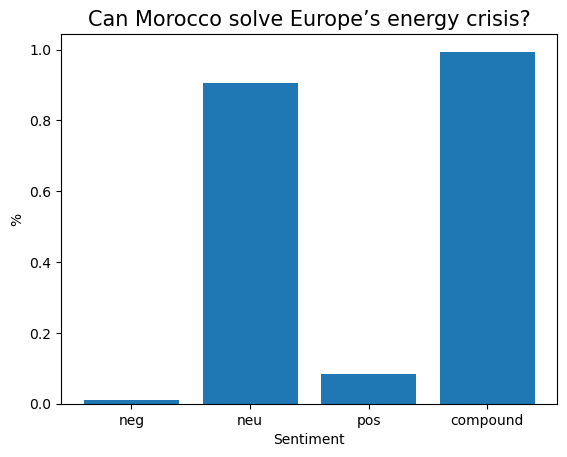

SentimentIntensityAnalyzer valora el text com: POSITIU


In [67]:
# Realitzem grafica:

import matplotlib.pyplot as plt

Sentiments = list(sentiment.keys())
Valors = list(sentiment.values())

plt.bar(Sentiments, Valors)

plt.title('Can Morocco solve Europe’s energy crisis?', fontsize = 15)
plt.xlabel('Sentiment') 
plt.ylabel('%') 

plt.show()


if sentiment['compound'] < 0.01:
    print("SentimentIntensityAnalyzer valora el text com: NEGATIU")
        
elif sentiment['compound'] > 0.01:
    print("SentimentIntensityAnalyzer valora el text com: POSITIU")
    
else:
    print("SentimentIntensityAnalyzer valora el text com: NEUTRAL")

- __Sentiment Analysis TEXTBLOB__

In [68]:
!pip3 install textblob

In [69]:
# Analisi de 'polarity' i 'subjectivity' amb TextBlob

from textblob import TextBlob

analisis_textblob = TextBlob(text).sentiment

print(analisis_textblob)

Sentiment(polarity=0.07457748378309126, subjectivity=0.38620719882402116)


#### Comentaris:

- 'Polarity' és una mesura de l'actitud de l'autor del text. Oscil·la entre -1 i 1: Valors negatius indiquen sentiments negatius i valors positius indiquen sentiments positus.
- En aquest cas tenim una 'Polarity' = 0,074577 que pot indicar que el text es lleugerament positiu.

- 'Subjectivity' és una mesura de en quant l'autor està expressant les seves opinions i sentiments personals, en lloc de fets objectius. Oscil·la entre 0 i 1: 0 indica que l'autor està incloent fets objectius i 1 indica que l'autor està expressant completament les seves opinions i sentiments personals.
- En aquest cas el valor de 'subjectivity' = 0,3918, indicant així que podria ser que l'autor estigués expressant certa subjectivitat i opinió.

--------------------------------------------------------------------------------------------------------------------------------

#### Comentaris finals:

- El text parla del potencial del Marroc en quant a la generació d'energia renovable, explicant projectes i objectius futurs així com detallant possibles col·laboracions futures amb paisos Europeus per la venta de l'energia renovable.
     - El text te un caracter positiu, coincidint amb els resultats dels analisis, donat que detalla possibles solucions a la crisi energètica europea.
- El text inclou referencies / sentencies de diferents membres marroquins del sector públic i privat, en les que s'inlcouen les seves opinions.
     - Aquest fet podria explicar el valor 'subjectivity' = 0,3918 que mes enllà de ser opinió de l'autor de l'article, detecta la opinió, en aquest cas dels diferents interlocutors del sector.
   



--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

In [71]:
# Per obtenir .txt amb llibreries i versions 

pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
